
# Data Understanding(Memahami Data)
**Data understandung dalam data mining**

Data Understanding adalah salah satu tahap penting dalam proses Knowledge Discovery in Databases (KDD) atau Data Mining. Ini merupakan langkah awal yang bertujuan untuk memahami data secara mendalam sebelum melakukan analisis lebih lanjut. Pemahaman data yang baik sangat krusial karena akan memengaruhi keberhasilan seluruh proses data mining.

Proses eksplorasi, investigasi, dan analisis awal terhadap dataset untuk:

**Apa itu data data understanding?**

Memahami struktur, isi, dan karakteristik data.
Mengidentifikasi pola, tren, anomali, atau masalah dalam data.
Menentukan apakah data tersebut sesuai dengan tujuan analisis atau perlu dilakukan preprocessing tambahan.
Tahap ini sering dianggap sebagai fondasi dari keseluruhan proses data mining karena hasilnya akan memandu langkah-langkah berikutnya, seperti data preparation, modeling, dan evaluation.

**Tujuan Data Understanding**

Tujuan utama dari data understanding adalah:
Memahami Konteks Data:
Mengetahui dari mana data berasal, apa arti setiap variabel, dan bagaimana hubungan antarvariabel.

Mendeteksi Masalah Data:
Mengidentifikasi missing values, outliers, noise, atau inkonsistensi dalam data.

Menilai Kualitas Data:
Memastikan bahwa data cukup berkualitas untuk digunakan dalam analisis. Hal ini meliputi pemeriksaan akurasi, kelengkapan, dan relevansi data.

Menentukan Arah Analisis:
Berdasarkan pemahaman awal, peneliti dapat merumuskan hipotesis atau menentukan teknik data mining yang tepat.

Beberapa kegiatan  dalam memahami diantaranya adalah:


*   Pengumpulan data
*   Profilling data
*   Korelasi dan asosiasi
*   Ekplorasi data
*   Identifikasi Masalah
*   Validasi data



# **1.Pengumpulan Data**

Data iris adalah dataset yang berisi data 3 spesies bunga iris yang berlabel(setosa,versicolor,Virginica), dengan 4 fitur yaitu sepal_length,sepal_width,petal_length,petal_width

Lokasi data berada di aiven.io


*   Data iris petal berada di database MySQL
*   Data iris sepal berada di database PostgreSQL

#### **Langkah Pengumpulan data**
1. **`pymysql`** → Untuk menghubungkan dan mengambil data dari MySQL.
2. **`psycopg2-binary`** → Untuk menghubungkan dan mengambil data dari PostgreSQL.
3. **`pandas`** → Untuk membaca dan mengolah data setelah diambil dari database.
4. **'`sqlalchemy'`** → ORM (Object-Relational Mapping) yang digunakan untuk mempermudah interaksi dengan database relasional.




#### **Cara Mengumpulkan Data**

#### **1. Menghubungkan ke MySQL dan PostgreSQL**
- Install library python yang diperlukan

In [25]:
!pip install pymysql
!pip install pandas
!pip install psycopg2
!pip install sqlalchemy
!pip install seaborn
!pip install numpy pandas scikit-learn pyod matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip




*   **Menghubungkan database yang di aiven.io**



In [26]:
import psycopg2
import pymysql
import pandas as pd
from sqlalchemy import create_engine

# Konfigurasi koneksi PostgreSQL
postgres_config = {
    'host': 'rendydevanodanendra-iris-mysqldatamining.l.aivencloud.com',
    'port': 25241,
    'user': 'avnadmin',
    'password': 'AVNS_FFOWj--XLs8RxkVrDRF',
    'database': 'defaultdb'
}

# Konfigurasi koneksi MySQL
mysql_config = {
    'host': 'rendydevanodanendra-mysql-devano.i.aivencloud.com',
    'port': 23259,
    'user': 'avnadmin',
    'password': 'AVNS_wFznH835_f1Llb65Rr5',
    'database': 'defaultdb'
}

try:
    # Membuat koneksi SQLAlchemy ke MySQL
    mysql_engine = create_engine(
        f"mysql+pymysql://{mysql_config['user']}:{mysql_config['password']}@{mysql_config['host']}:{mysql_config['port']}/{mysql_config['database']}"
    )

    # Membuat koneksi SQLAlchemy ke PostgreSQL
    pg_engine = create_engine(
        f"postgresql+psycopg2://{postgres_config['user']}:{postgres_config['password']}@{postgres_config['host']}:{postgres_config['port']}/{postgres_config['database']}"
    )

    # Jalankan query MySQL
    mysql_query = "SELECT * FROM iris_data;"
    df_mysql = pd.read_sql(mysql_query, mysql_engine)

    # Jalankan query PostgreSQL
    pg_query = "SELECT * FROM iris_data;"
    df_postgres = pd.read_sql(pg_query, pg_engine)

    # Print hasil
    print("Data dari MySQL (Petal Data):")
    print(df_mysql.head())

    print("\nData dari PostgreSQL (Sepal Data):")
    print(df_postgres.head())
    

except Exception as e:
    print(f"Terjadi error: {e}")

finally:
    # Menutup koneksi
    mysql_engine.dispose()
    pg_engine.dispose()


Data dari MySQL (Petal Data):
   id        class  petal_length  petal_width
0   1  Iris-setosa          70.0         86.4
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

Data dari PostgreSQL (Sepal Data):
   id        class  sepal_length  sepal_width
0   2  Iris-setosa           4.9          3.0
1   3  Iris-setosa           4.7          3.2
2   4  Iris-setosa           4.6          3.1
3   5  Iris-setosa           5.0          3.6
4   6  Iris-setosa           5.4          3.9



*   **2.Mengambil dan menampilkan data**



In [27]:
# mysql_query = "SELECT * FROM iris_data;"
# df_mysql = pd.read_sql(mysql_query, mysql_engine)

# pg_query = "SELECT * FROM iris_data;"
# df_postgres = pd.read_sql(pg_query, pg_engine)

mysql_query = "SELECT * FROM iris_data ORDER BY id;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data ORDER BY id;"
df_postgres = pd.read_sql(pg_query, pg_engine)


# Print hasil query
print("Data dari MySQL:")
print(df_mysql)

print("\n Data dari PostgreSQL:")
print(df_postgres)

Data dari MySQL:
      id           class  petal_length  petal_width
0      1     Iris-setosa          70.0         86.4
1      2     Iris-setosa           1.4          0.2
2      3     Iris-setosa           1.3          0.2
3      4     Iris-setosa           1.5          0.2
4      5     Iris-setosa           1.4          0.2
..   ...             ...           ...          ...
145  146  Iris-virginica           5.2          2.3
146  147  Iris-virginica           5.0          1.9
147  148  Iris-virginica           5.2          2.0
148  149  Iris-virginica           5.4          2.3
149  150  Iris-virginica           5.1          1.8

[150 rows x 4 columns]

 Data dari PostgreSQL:
      id           class  sepal_length  sepal_width
0      1     Iris-setosa          20.1         30.5
1      2     Iris-setosa           4.9          3.0
2      3     Iris-setosa           4.7          3.2
3      4     Iris-setosa           4.6          3.1
4      5     Iris-setosa           5.0          3.6



*   **3.Menggambungkan data dari kedua data base cihuy**



In [28]:
# Pilih kolom 'class' hanya dari PostgreSQL
# postgres_id = df_postgres[['id']]

# Pilih kolom petal dari MySQL
mysql_petal = df_mysql[['id','class','petal_length', 'petal_width']]

# Pilih kolom sepal dari PostgreSQL
postgres_sepal = df_postgres[['sepal_length', 'sepal_width']]

# Gabungkan semua data secara horizontal
combined_df = pd.concat([ mysql_petal, postgres_sepal], axis=1)

# Tampilkan hasil gabungan
print("\nData Gabungan dengan Class dari PostgreSQL:")
print(combined_df.head())  # Menampilkan 10 baris pertama



Data Gabungan dengan Class dari PostgreSQL:
   id        class  petal_length  petal_width  sepal_length  sepal_width
0   1  Iris-setosa          70.0         86.4          20.1         30.5
1   2  Iris-setosa           1.4          0.2           4.9          3.0
2   3  Iris-setosa           1.3          0.2           4.7          3.2
3   4  Iris-setosa           1.5          0.2           4.6          3.1
4   5  Iris-setosa           1.4          0.2           5.0          3.6


### **2.Profiling data**

*   Ringkasan tentang setiap variabel dalam dataset,termasuk tipe data (numerik, kategorikal, ordinal), rentang nilai, dan frekuensi kemunculan dan Hubungan antarvariabel menggunakan korelasi
atau analisis asosiasi



#### **Ringkasan variabel dalam dataset**

- Menampilkan Informasi Dataset

In [29]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   class         150 non-null    object 
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   sepal_length  150 non-null    float64
 5   sepal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


### **Menampilkan statistik dasar untuk kolom numerik:**


*   Count: Jumlah data yang valid
*   Mean: Rata-rata nilai.
*   Std: Standar deviasi (keragaman data).
*   Min & Max: Nilai minimum dan maksimum.
*   25%, 50%, 75%: Persentil yang menggambarkan distribusi data.
*   Sesuai dengan praktik terbaik untuk memahami distribusi nilai dalam dataset..


In [30]:
print(combined_df.drop(columns=['id']).describe())

       petal_length  petal_width  sepal_length  sepal_width
count    150.000000   150.000000    150.000000   150.000000
mean       4.216000     1.773333      5.943333     3.234000
std        5.684573     6.997369      1.426895     2.282464
min        1.000000     0.100000      4.300000     2.000000
25%        1.600000     0.300000      5.100000     2.800000
50%        4.400000     1.300000      5.800000     3.000000
75%        5.100000     1.800000      6.400000     3.300000
max       70.000000    86.400000     20.100000    30.500000


### **Menghitung frekuensi kemunculan tiap kelas:**
Menampilkan jumlah instance dari masing-masing kelas.

In [31]:
print(combined_df['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### **3.Korelasi dan asosiasi**




*   Menghitung koefisien korelasi (misalnya Pearson, Spearman)untuk melihat hubungan linier antar variabel.
*   Menggunakan teknik asosiasi untuk menemukan pola
hubungan antara variabel kategorikal.





### **Menghitung korelasi pearson**

In [32]:
df_korelasi =combined_df.drop(columns=['id', 'class']).corr()
print(df_korelasi)

              petal_length  petal_width  sepal_length  sepal_width
petal_length      1.000000     0.977805      0.931295     0.909778
petal_width       0.977805     1.000000      0.861968     0.968934
sepal_length      0.931295     0.861968      1.000000     0.789396
sepal_width       0.909778     0.968934      0.789396     1.000000


###  **memvisualisasikan matriks korelasi antar variabel numerik**

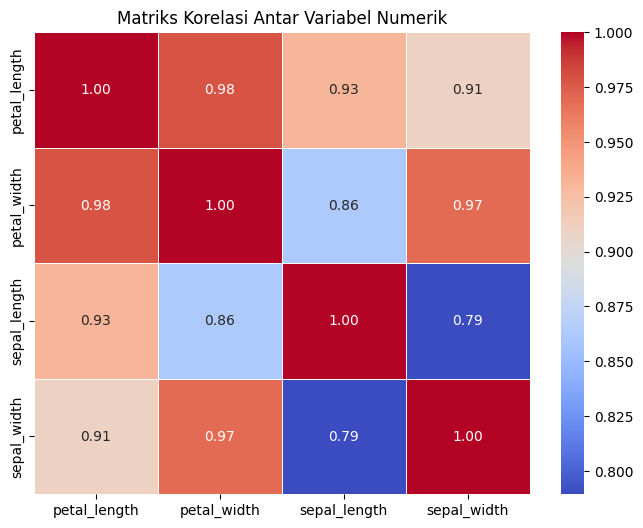

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar variabel numerik
df_korelasi = combined_df.drop(columns=['id', 'class']).corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_korelasi, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()


###  karakteristik rata-rata setiap spesies bunga dalam dataset Iris

In [34]:
df_mean = combined_df.drop(columns=['id']).groupby('class').mean()
print(df_mean)


                 petal_length  petal_width  sepal_length  sepal_width
class                                                                
Iris-setosa             2.836        1.968         5.306        3.958
Iris-versicolor         4.260        1.326         5.936        2.770
Iris-virginica          5.552        2.026         6.588        2.974


### **menunjukkan distribusi panjang kelopak bunga (petal_length) berdasarkan kelas (class) dari dataset Iris.**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5944\792531445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="petal_length", data=combined_df, palette="Set2")


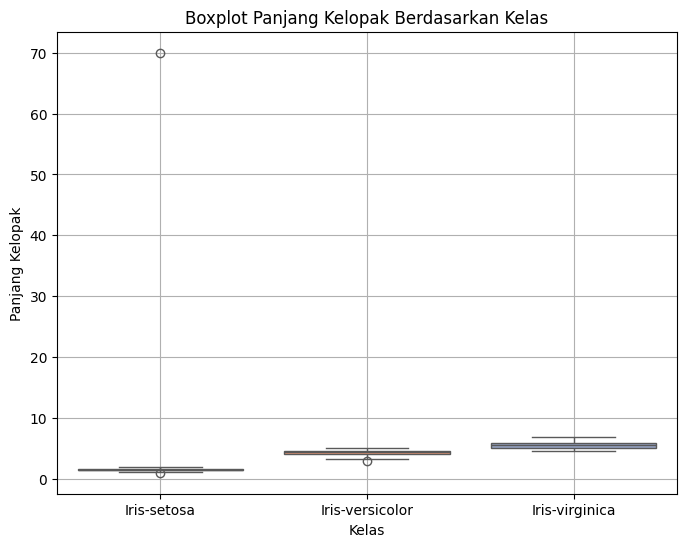

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y="petal_length", data=combined_df, palette="Set2")

plt.title("Boxplot Panjang Kelopak Berdasarkan Kelas")
plt.xlabel("Kelas")
plt.ylabel("Panjang Kelopak")
plt.grid(True)
plt.show()


###  **4.Eksplorasi Data**



*   Melakukan deskripsi statistik untuk memahami distribusi
data, seperti mean, median, modus, standar deviasi,
minimum, dan maksimum.
*   Menggunakan visualisasi data (grafik, histogram, scatter plot)
untuk melihat pola atau tren awal.




### **Histogram digunakan untuk melihat distribusi data dari setiap fitur (petal_length, petal_width, sepal_length, dan sepal_width). Ini membantu memahami penyebaran data serta mengidentifikasi pola yang mungkin ada.**

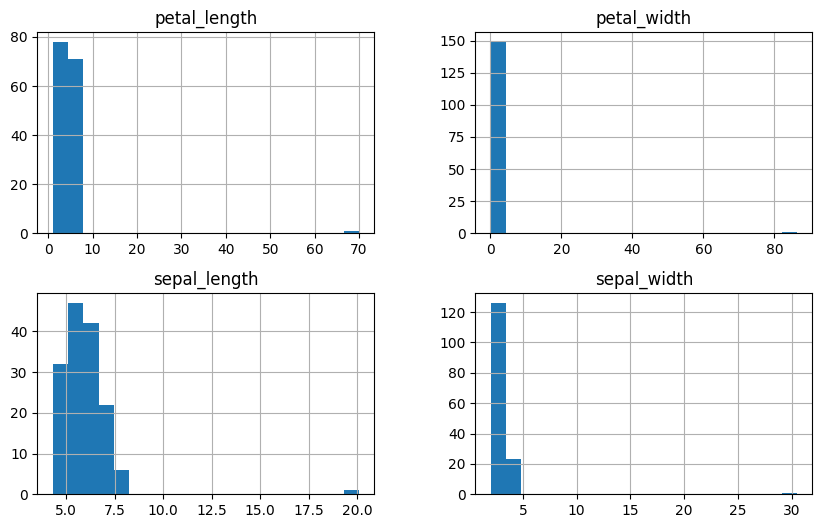

In [36]:
import matplotlib.pyplot as plt

combined_df.loc[:,combined_df.columns != 'id'].hist(figsize=(10, 6), bins=20)
plt.show()

### **boxplot untuk melihat distribusi dan outlier dalam setiap fitur serta memahami variasi data dan mendeteksi anomali.**

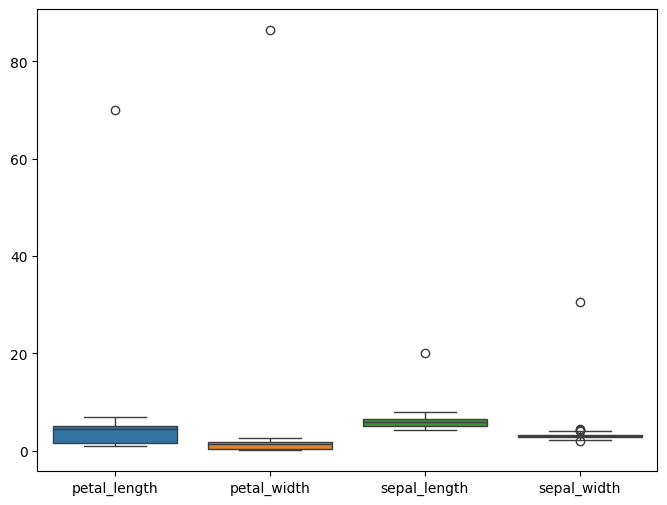

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(data=combined_df.loc[:, combined_df.columns != 'id'])
plt.show()


### **Scatterplot Matrix melihat hubungan antara fitur berdasarkan kelas, serta mengidentifikasi pola, asosiasi, dan kemungkinan korelasi antar variabel.**

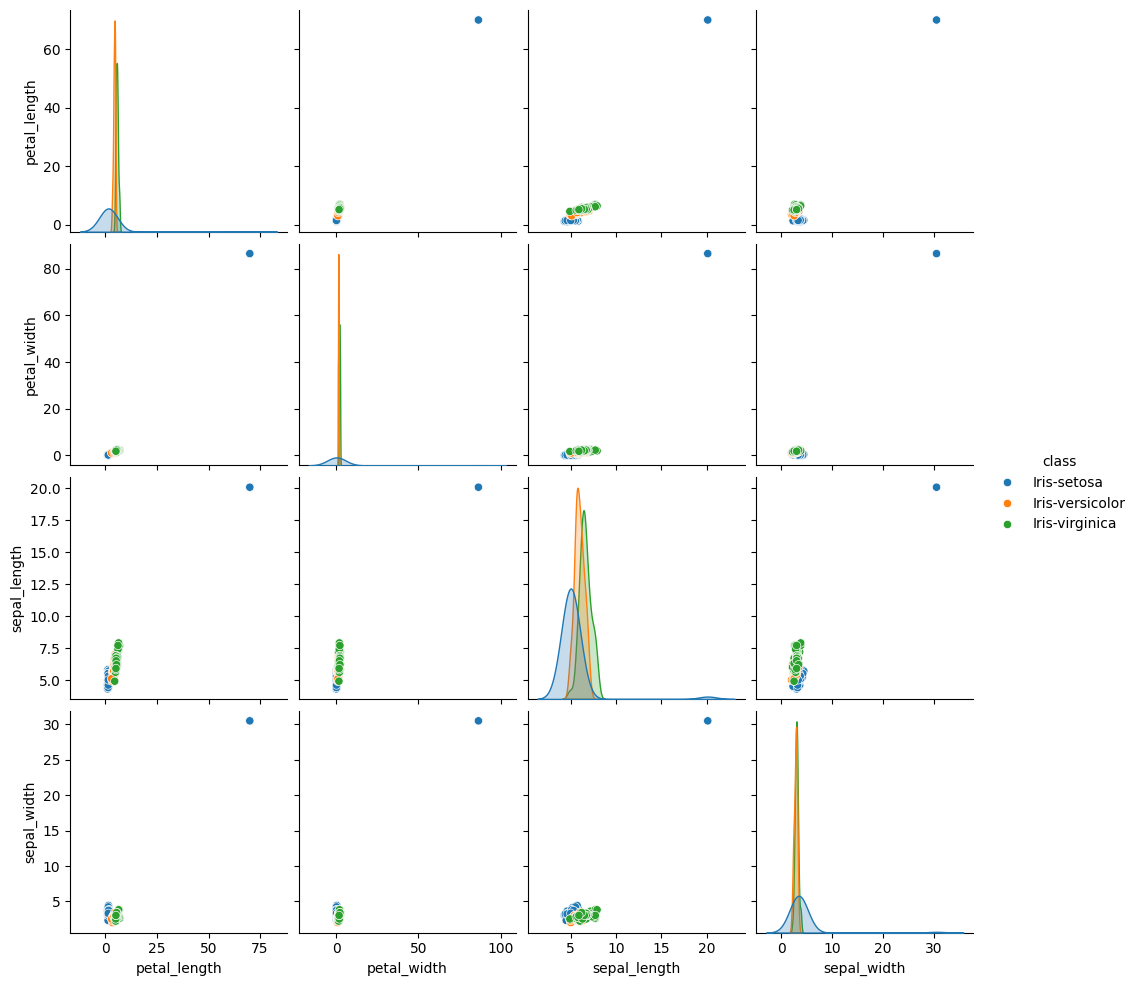

In [38]:
sns.pairplot(combined_df.drop(columns=["id"]), hue="class")
plt.show()

### **5.Identifikasi masalah data**

Missing Values: Menemukan data yang hilang atau tidak
lengkap.

In [39]:
print(combined_df.isnull().sum())

id              0
class           0
petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
dtype: int64


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN  # Model KNN untuk deteksi outlier

# Load dataset Iris yang sudah diubah
data = combined_df

# Menampilkan beberapa baris data
print(data.head())


   id        class  petal_length  petal_width  sepal_length  sepal_width
0   1  Iris-setosa          70.0         86.4          20.1         30.5
1   2  Iris-setosa           1.4          0.2           4.9          3.0
2   3  Iris-setosa           1.3          0.2           4.7          3.2
3   4  Iris-setosa           1.5          0.2           4.6          3.1
4   5  Iris-setosa           1.4          0.2           5.0          3.6


In [41]:
# Hanya gunakan fitur numerik untuk deteksi outlier
features = ["sepal_length", "sepal_width"]  # Sesuaikan dengan dataset yang sudah diubah
X = data[features]

# Standarisasi data agar skala seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:


# Model KNN untuk deteksi outlier (k=5) dengan Euclidean Distance
knn_model = KNN(n_neighbors=5, method="euclidean", contamination=0.05)  # 5% data dianggap outlier
knn_model.fit(X_scaled)

# Prediksi outlier (1 = outlier, 0 = normal)
outlier_predictions = knn_model.predict(X_scaled)

# Menambahkan kolom hasil deteksi ke dataset
data["outlier"] = outlier_predictions

# Menampilkan jumlah outlier
print("Jumlah outlier yang terdeteksi:", sum(outlier_predictions))



AttributeError: 'NoneType' object has no attribute 'ravel'

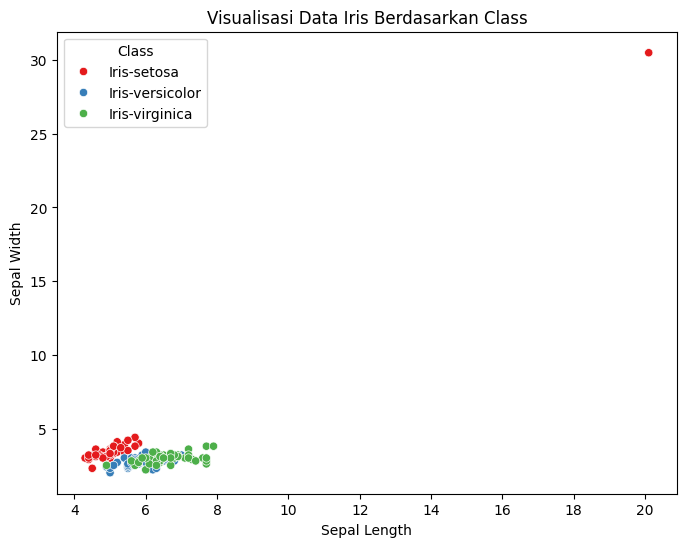

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(data=data, x="sepal_length", y="sepal_width", hue="class", palette="Set1")

plt.title("Visualisasi Data Iris Berdasarkan Class")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Class")
plt.show()


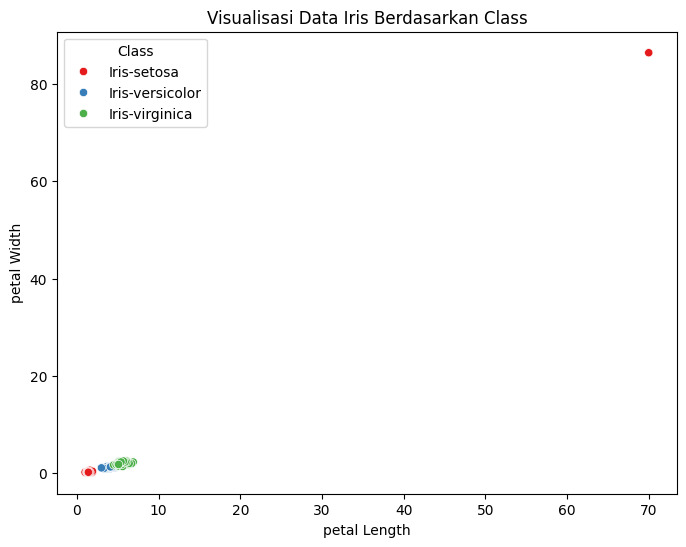

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(data=data, x="petal_length", y="petal_width", hue="class", palette="Set1")

plt.title("Visualisasi Data Iris Berdasarkan Class")
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend(title="Class")
plt.show()


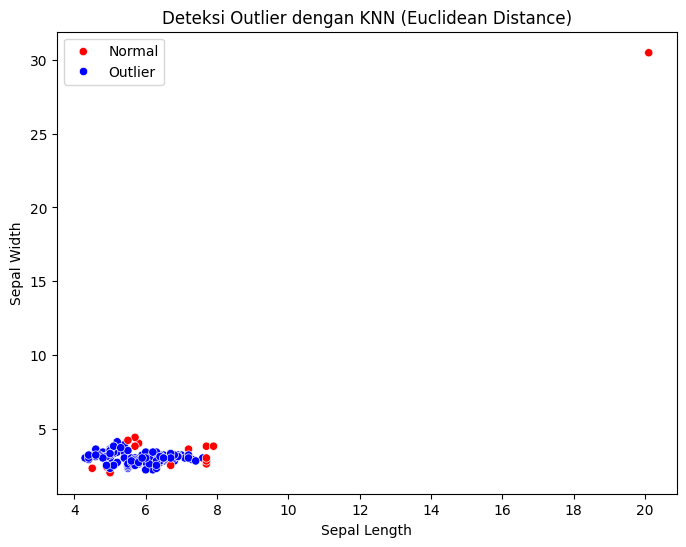

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

# Contoh dataset (gunakan data asli jika sudah ada)
data = combined_df #antilah dengan query dari database

# Pilih fitur numerik yang akan digunakan
X = data[["sepal_length", "sepal_width"]].values  # Bisa ditambah petal_length, petal_width

# Menentukan jumlah tetangga (k)
k = 5  # Bisa dicoba 3, 5, atau 7

# Menghitung jarak dengan KNN menggunakan Euclidean Distance
nbrs = NearestNeighbors(n_neighbors=k, metric="euclidean")
nbrs.fit(X)

# Menghitung jarak dan indeks k-tetangga terdekat
distances, indices = nbrs.kneighbors(X)

# Menentukan threshold outlier (contoh: persentil 90 dari rata-rata jarak)
threshold = np.percentile(distances.mean(axis=1), 90)

# Tandai outlier (1 = Outlier, 0 = Normal)
data["outlier"] = (distances.mean(axis=1) > threshold).astype(int)

# Visualisasi
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="sepal_length", y="sepal_width", hue="outlier", palette={0: "blue", 1: "red"})
plt.title("Deteksi Outlier dengan KNN (Euclidean Distance)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(["Normal", "Outlier"])
plt.show()


KNN(K-Nearest Neighbors) adalah algoritma berbasis jarak yang mengidentifikasi outlier berdasarkan kedekatan suatu titik data dengan tetangga
terdekatnya.

Outlier: Titik data yang jaraknya jauh dari sebagian besar data lain.  
Euclidean Distance: Metrik jarak antara dua titik dalam ruang multidimensi.  
2. Intuisi Matematis
  
Rumus Euclidean Distance untuk titik ( P(x_1, x_2, ..., x_n) ) dan ( Q(y_1, y_2, ..., y_n) ):
[ d(P, Q) = \sqrt{\sum_^n (x_i - y_i)^2} ]  
Threshold: Batas statistik (misalnya, persentil ke-95) untuk menentukan outlier.
Langkah Implementasi
1. Pilih Nilai ( k )
Tentukan jumlah tetangga terdekat (misal: ( k = 3 ) atau ( k = 5 )).
2. Hitung Jarak Euclidean
Untuk setiap titik data, hit ung jarak ke ( k )-tetangga terdekat.
3. Hitung Rata-Rata Jarak
Rata-rata jarak ( k )-tetang ga terdekat menjadi indikator "keterasingan" suatu titik.
4. Tentukan Threshold
Gunakan persentil (mi sal: 95%) atau standar deviasi untuk menetapkan batas outlier.
5. Identifikasi Outlier
Titik dengan rata-rata jarak > threshold dianggap outlier.

In [ ]:
# Memilih hanya kolom numerik
df_numeric = combined_df.select_dtypes(include=['number'])

# Menghitung IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Menentukan outliers
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
print(outliers.sum())  # Menampilkan jumlah outliers per kolom


id              0
petal_length    1
petal_width     1
sepal_length    1
sepal_width     5
dtype: int64


Duplikasi Data: Mengidentifikasi baris atau entri yang
duplikat.

In [ ]:
# Menemukan data yang duplikat
duplicates = combined_df[combined_df.duplicated()]

# Menampilkan data duplikat (jika ada)
if not duplicates.empty:
    print("Data duplikat ditemukan:")
    print(duplicates)
else:
    print("Tidak ada data duplikat ditemukan.")


Tidak ada data duplikat ditemukan.


Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam
format atau nilai data.

In [ ]:
# Cek nilai unik pada kolom kategori (misalnya 'class')
unique_classes = combined_df['class'].unique()
unique_id = combined_df['petal_length'].unique()
print("Nilai unik pada kolom 'class':", unique_classes)
print("Nilai unik pada kolom 'id':", unique_id)


Nilai unik pada kolom 'class': ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Nilai unik pada kolom 'id': [70.   1.4  1.3  1.5  1.7  1.6  1.1  1.2  1.   1.9  4.7  4.5  4.9  4.
  4.6  3.3  3.9  3.5  4.2  3.6  4.4  4.1  4.8  4.3  5.   3.8  3.7  5.1
  3.   6.   5.9  5.6  5.8  6.6  6.3  6.1  5.3  5.5  6.7  6.9  5.7  6.4
  5.4  5.2]


Kesimpulannya, dataset Iris ini memiliki distribusi yang baik tanpa data yang hilang, serta menunjukkan pola dan korelasi yang dapat dimanfaatkan dalam proses data mining